------- LoRa Modulator initialized! -------
Spreading Factor = 7
Bandwidth = 125000.0
Samples Per Chip = 10
Preamble Units = 1
Verbosity = Detailed
------------ Lora Modulator Visualizer -----------
Transmitting package with:
4 Payload symbol(s): [10, 20, 30, 90]
Explicit Header: False
Spreading factor: 7
Bandwidth: 125000.0
Samples per chip (Oversampling Factor): 10
Preamble + SFD Structure: 1+2 Upchirps, 2 Downchirps, 1 Quarter Downchirp


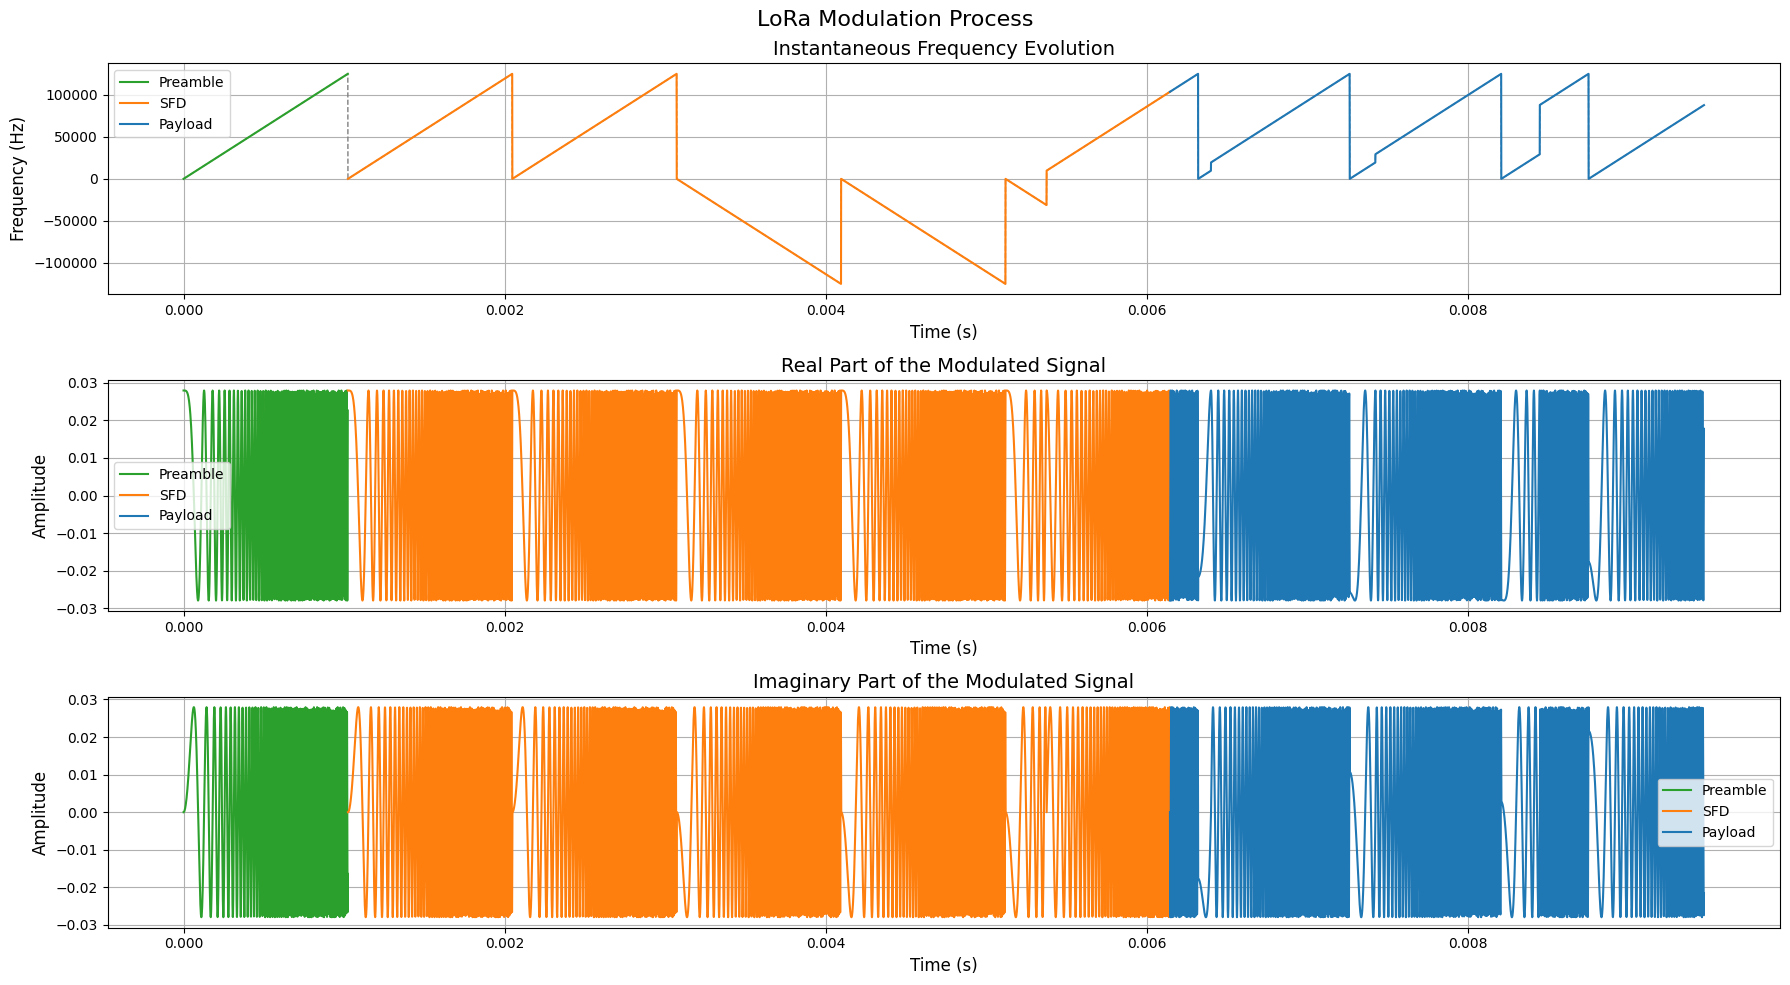

-------- Lora Demodulator Visualizer --------
Received Symbols: [10, 20, 30, 90]


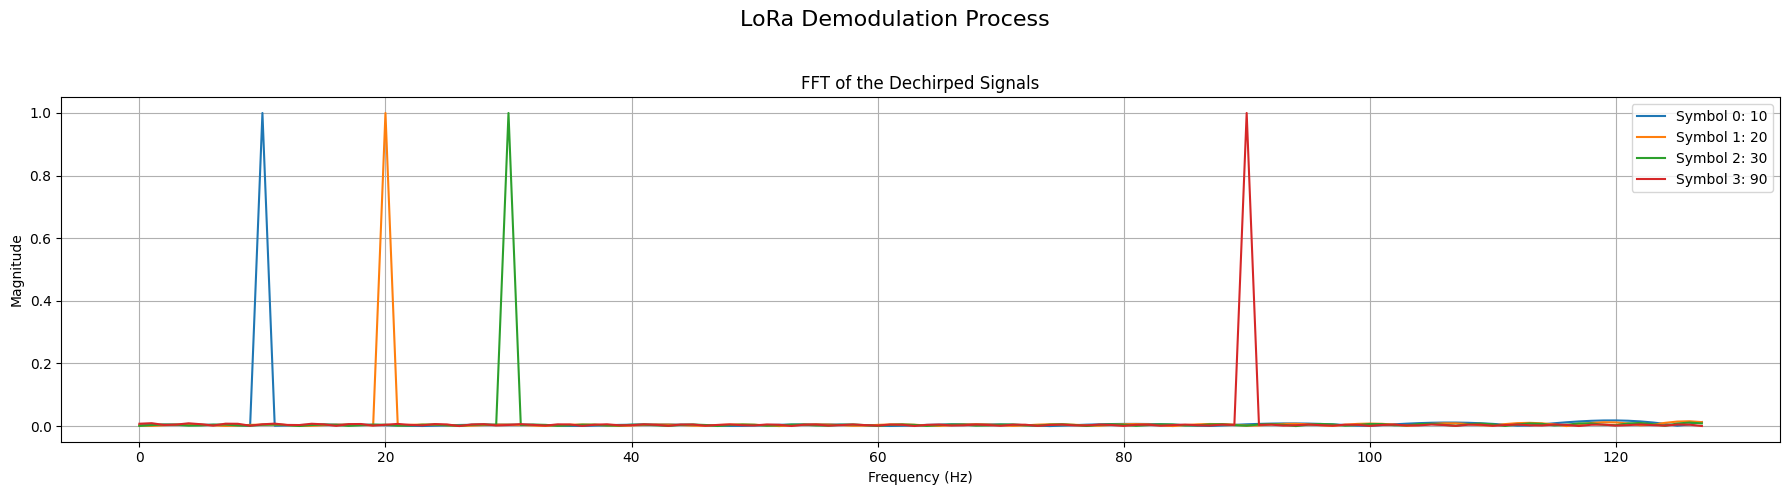

In [5]:
from lora_modulator import LoraModulator as NewMod
from lora_demodulator import LoraDemodulator as NewDemod
import numpy as np
from matplotlib import pyplot as plt
import time

sf, bw, spc, pn = 7, 125e3, 10, 1
payload = [10, 20, 30, 90]

mod = NewMod(sf, bw, spc, pn, verbosity="Detailed")

demod = NewDemod(sf, bw, spc, verbosity="Compact")

payload_signal = mod.generate_signal(payload)
pkg_signal = mod.generate_package(payload)

symbols = demod.demodulate_symbols(payload_signal)




Test 1 (Plotted): Testing if all symbols are correctly demodulated when spc=1, spreading factor=7, bandwidth=125kHz


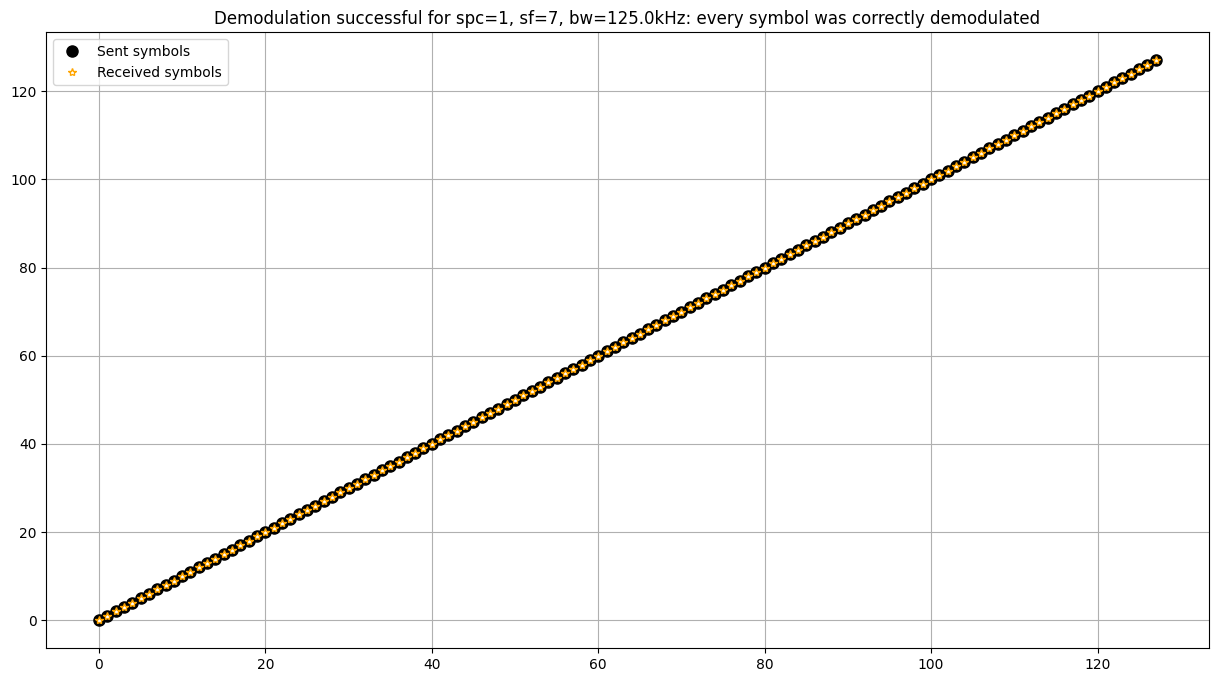

Test 2: Testing if all symbols are correctly demodulated when spc=[2, 4,8, 10], spreading factor=7, bandwidth=125kHz
Demodulation successful for spc=2, sf=8, bw=125.0kHz: every symbol was correctly demodulated
Demodulation successful for spc=4, sf=8, bw=125.0kHz: every symbol was correctly demodulated
Demodulation successful for spc=8, sf=8, bw=125.0kHz: every symbol was correctly demodulated
Demodulation successful for spc=10, sf=8, bw=125.0kHz: every symbol was correctly demodulated
Test 3: Testing if all symbols are correctly demodulated when spc=1, spreading factor=[7, 8, 9, 10, 11, 12], bandwidth=125kHz
Demodulation successful for spc=1, sf=7, bw=125.0kHz: every symbol was correctly demodulated
Demodulation successful for spc=1, sf=8, bw=125.0kHz: every symbol was correctly demodulated
Demodulation successful for spc=1, sf=9, bw=125.0kHz: every symbol was correctly demodulated
Demodulation successful for spc=1, sf=10, bw=125.0kHz: every symbol was correctly demodulated
Demodulatio

In [6]:
import numpy as np
from lora_modulator import LoraModulator
def signal_power(signal):
    # Calculate the signal power
    P = np.mean(np.abs(signal-np.mean(signal))**2)
    return P

def generate_awgn(SNR, w):
    # Check if SNR is given in dB, DB, or db and convert if necessary
    if isinstance(SNR, str) and SNR.lower().endswith('db'):
        SNR_linear = 10 ** (float(SNR[:-2]) / 10)
    elif isinstance(SNR, int) or isinstance(SNR, float):
        SNR_linear = float(SNR)
    else:
        raise ValueError("SNR must be a number or a string ending with 'dB'.")
    
    if SNR_linear <= 0:
        raise ValueError("SNR must be a positive value.")
    signal_len = len(w)

    # Determine the noise power (variance)
    variance = signal_power(w) / SNR_linear
    # Generate noise
    noise = noise = np.sqrt(variance / 2) * (np.random.randn(signal_len) + 1j * np.random.randn(signal_len))
    
    # Add noise to the signal
    noisy_signal = w + noise
    
    return noisy_signal, noise, variance

def generate_all_symbols(sf, spc=1, bw=125e3):
    """Genera todos los posibles símbolos LoRa mediante un modulador configurado (para un spreading factor, bandwidth y samples per chip especifico) en una señal, con cada símbolo concatenado de manera ascendente."""
    symbol_signals = []

    mod = LoraModulator(sf, bw, spc, preamble_length= 8, verbosity="Simple")
    for i in range(2**sf):
        symbol_signals.append(mod.generate_signal([i]))
 
    return symbol_signals

from lora_demodulator import LoraDemodulator

def test_all_symbols(spreading_factor, bandwidth, samples_per_chip, plot=True):
    modulator = LoraModulator(spreading_factor, bandwidth, samples_per_chip, 8, "Simple")
    demodulator = LoraDemodulator(spreading_factor, bandwidth, samples_per_chip, "Simple")
    symbols_to_send= [i for i in range(2**spreading_factor)]
    signal = modulator.generate_signal(symbols_to_send)
    received_symbols = demodulator.demodulate_symbols(signal)

    if plot:
        if symbols_to_send == received_symbols:
            config = f"spc={samples_per_chip}, sf={spreading_factor}, bw={bandwidth/1000}kHz"
            plt.title(f'Demodulation successful for {config}: every symbol was correctly demodulated')
        else:
            plt.title('Error in demodulation')

        plt.plot(symbols_to_send,'o', label='Sent symbols', markersize=8, color = 'black')
        plt.plot(received_symbols, '*', label='Received symbols', markersize=6, color = 'white', markeredgecolor='orange')
        plt.legend()
    
    else:
        if symbols_to_send != received_symbols:
            print(f'Error in demodulation: {symbols_to_send} != {received_symbols}')
        else:
            config = f"spc={samples_per_chip}, sf={spreading_factor}, bw={bandwidth/1000}kHz"
            print(f'Demodulation successful for {config}: every symbol was correctly demodulated')
    return symbols_to_send, received_symbols

print('Test 1 (Plotted): Testing if all symbols are correctly demodulated when spc=1, spreading factor=7, bandwidth=125kHz')
plt.figure(figsize=(15, 8))
sent_symbols, received_symbols = test_all_symbols(7, 125e3, 1, plot=True)
plt.grid()
plt.show()
print('Test 2: Testing if all symbols are correctly demodulated when spc=[2, 4,8, 10], spreading factor=7, bandwidth=125kHz')
for spc in [2, 4, 8, 10]:
    test_all_symbols(8, 125e3, spc, plot=False)

print('Test 3: Testing if all symbols are correctly demodulated when spc=1, spreading factor=[7, 8, 9, 10, 11, 12], bandwidth=125kHz')
for sf in [7, 8, 9, 10, 11, 12]:
    test_all_symbols(sf, 125e3, 1, plot=False)

print('Test 4: Testing if all symbols are correctly demodulated when spc=1, spreading factor=7, bandwidth=[125e3, 250e3, 500e3]')
for bw in [125e3, 250e3, 500e3]:
    test_all_symbols(7, bw, 1, plot=False)

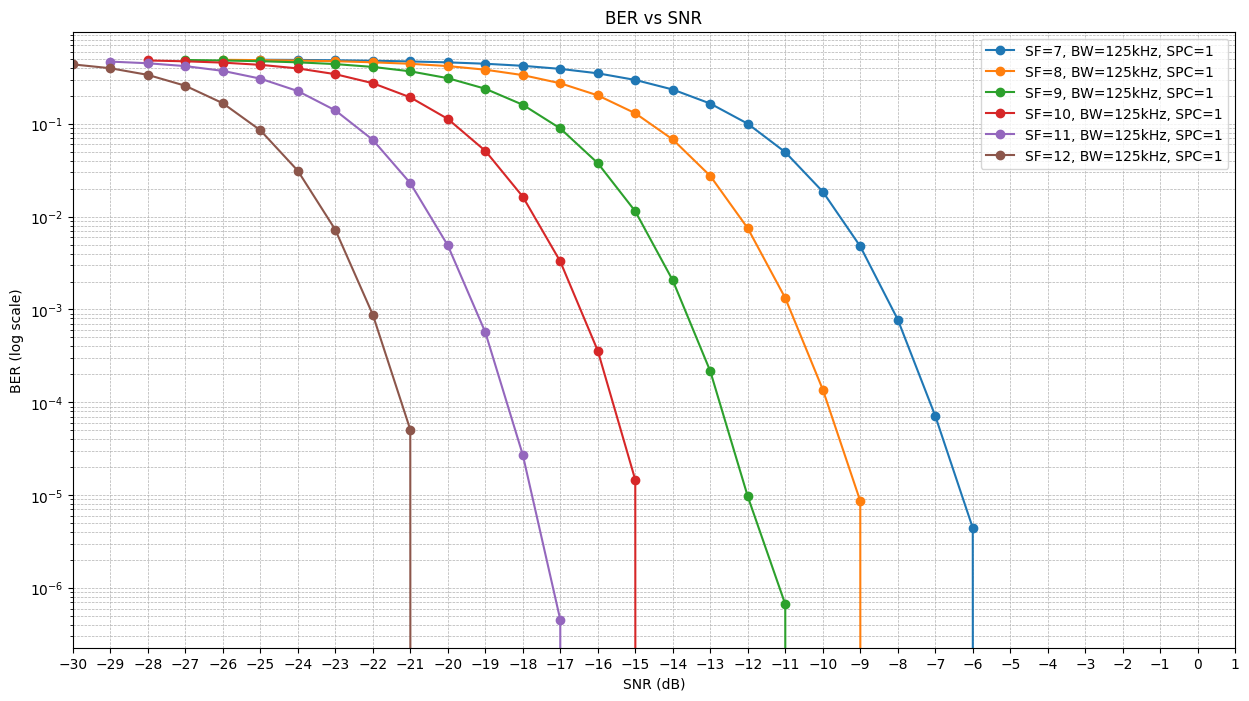

In [9]:
from lora_demodulator import LoraDemodulator

def generate_BER_SNR_ratio_binary(sf, bw=125e3, spc=1, simulations_number=1000000, snr_range=None):
    """Generates the Bit Error Rate (BER) vs Signal-to-Noise Ratio (SNR) for a given Spreading Factor (sf) and saves it in a binary file."""
    # Inicializa rango de SNR, todo simbolo posible para enviar, demodulador LoRa y listas de resultados
    if snr_range is None:
        snr_range = np.arange(-30 + 12 - sf, 2, 1)
    bits_per_symbol = sf


    demod = LoraDemodulator(sf, bw, spc, verbosity="Simple")
    symbol_signals = generate_all_symbols(sf, spc, bw)
    SNR_values = []
    BER_values = []
    
    for snr in snr_range:
        print(f'Processing BER for SNR = {snr} dB')
        bit_errors = 0

        for _ in range(simulations_number):
            
            # Selecciona un símbolo aleatorio, se extra su señal ya modulada, se le añade ruido y se demodula
            message = np.random.randint(0, 2**sf)
            
            signal = symbol_signals[message]
            
            noisy_signal = generate_awgn(f'{snr}dB', signal)[0]
            
            demodulated_message = demod.demodulate_symbols(noisy_signal)

            # Se calcula la cantidad de bits erróneos mediante XOR
            bit_errors += bin(demodulated_message[0] ^ message).count('1')
                
        # Se calcula la tasa de errores de bits (BER) y se añade a las listas
        BER = bit_errors / (simulations_number*bits_per_symbol)
        SNR_values.append(snr)
        BER_values.append(BER)
        if BER_values[-1] == 0 and BER_values[-2] == 0:
            # Fill the rest of the SNR values with 0
            for _ in range(len(snr_range) - len(SNR_values)):
                SNR_values.append(snr)
                BER_values.append(0)
            break
        print(f'BER for SNR = {snr} dB is {BER}')
    
    # Convierte las listas a arrays de numpy
    SNR_values = np.array(SNR_values)
    BER_values = np.array(BER_values)

    # Guarda los resultados en un archivo binario
    np.save(f'Measures/OnlyAWGN/BER_SNR_sf{sf}_bw{int(bw/1e3)}k_spc{spc}_example.npy', np.vstack((SNR_values, BER_values)))

    print(f"BER-SNR Metrics successfully generated for a Spreading Factor of {sf}, samples per chip of {spc} and {simulations_number} simulations.")

#generate_BER_SNR_ratio_binary(7, 125e3, 1, 1000000)


def plot_BER_SNR_from_binary(filename, sf ,spc, label_fill):
    
    # Load the binary file
    data = np.load(filename)
    SNR_values = data[0, :]
    BER_values = data[1, :]
    # Plot the data
    plt.plot(SNR_values, BER_values, marker='o', linestyle='-', label=label_fill)
    plt.xlim([SNR_values.min(), SNR_values.max()])
    plt.yscale('log')  # Logarithmic scale for BER
    plt.xticks(np.arange(-30 + 12 - sf, 2, 1))
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER (log scale)')
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.grid(True)
    plt.title(f'BER vs SNR')
    

# generate_BER_SNR_ratio_binary(11, 125e3, 1, 1000000)
# generate_BER_SNR_ratio_binary(12, 125e3, 1, 1000000)

plt.figure(figsize=(15, 8))
plot_BER_SNR_from_binary('Measures/SNRxBER_AWGN/spc1/BER_SNR_sf7.npy', 7, 1, 'SF=7, BW=125kHz, SPC=1')
plot_BER_SNR_from_binary('Measures/SNRxBER_AWGN/spc1/BER_SNR_sf8.npy', 8, 1, 'SF=8, BW=125kHz, SPC=1')
plot_BER_SNR_from_binary('Measures/SNRxBER_AWGN/spc1/BER_SNR_sf9.npy', 9, 1, 'SF=9, BW=125kHz, SPC=1')
plot_BER_SNR_from_binary('Measures/SNRxBER_AWGN/spc1/BER_SNR_sf10.npy', 10, 1, 'SF=10, BW=125kHz, SPC=1')
plot_BER_SNR_from_binary('Measures/SNRxBER_AWGN/spc1/BER_SNR_sf11.npy', 11, 1, 'SF=11, BW=125kHz, SPC=1')
plot_BER_SNR_from_binary('Measures/SNRxBER_AWGN/spc1/BER_SNR_sf12.npy', 12, 1, 'SF=12, BW=125kHz, SPC=1')
plt.legend()
plt.show()